## Observations and Insights 

In [4]:
#                                 CONCLUSIONS

#  1. ONLY 2 DRUGS SEEM TO WORK

#    Figuring that all mice started treatment with tumor sizes of 45, 
#    then only 2 drugs finished the study with average tumor size less than 45: Capomuline and Ramicane. 
#    I'm not sure why the other's are even considered "Promising," they aren't even close. I checked all 10,
#    the rest weren't any better. 

#  2. VERY STRONG CORRELATION COEFFICIENT OF .88 BETWEEN MOUSE WEIGHT AND FINAL TUMOR VOLUME

#    This is an interesting phenomenon. All mice started the study with tumor volume at 45. 
#    Why would the weight of the mouse have such an influence on final tumor volume?

#  3. WE NEED TO ANALYZE DATA AGAIN AND CONTROL FOR MOUSE WEIGHT

#    My hypothesis would be that the two drugs that seemed successful happened to have a 
#    disproportionate number of light mice. I was also curious if mice weight changed over the time periods.
#    I ran a check, and mice did not seem to change weight during the study. However, I also added an 
#    "Average Mouse Weight" column to the summary dataframe below and guest what? The average weight for the 
#    successful drugs was 20 grams, vers 27 grams for the unsuccessful drugs. Therefore, I would hypothesize that a 
#    very large percentage of success count be attibuted to testing on lighter mice. The analysis would need to 
#    control for mouse weight, and evaluate the results.



In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

pd.options.display.float_format = '{:,.2f}'.format # Set formatting

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [6]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_Df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

duplicated_ids_df = pd.DataFrame({"Duplicated Mouse IDs": duplicates_Df["Mouse ID"].unique()  })
duplicated_ids_df

,Duplicated Mouse IDs
0,g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_Df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]

clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_merge_df["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groupby = clean_merge_df.groupby('Drug Regimen')

#drug_regimen_groupby_df = pd.DataFrame({"Tumor Volume": drug_regimen_groupby["Tumor Volume (mm3)"]})

tumor_vol_df = pd.DataFrame({"Mean" : drug_regimen_groupby["Tumor Volume (mm3)"].mean(), 
                             "Median" : drug_regimen_groupby["Tumor Volume (mm3)"].median(),
                            "Mode" : drug_regimen_groupby["Tumor Volume (mm3)"].agg(pd.Series.mode), 
                             "Variance" : drug_regimen_groupby["Tumor Volume (mm3)"].var(),
                             "Standard Dev" : drug_regimen_groupby["Tumor Volume (mm3)"].std(),
                             "SEM" : drug_regimen_groupby["Tumor Volume (mm3)"].sem()             })    

tumor_vol_df


,Mean,Median,Mode,Variance,Standard Dev,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.45,45.00,43.85,6.62,0.54
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_df.agg(["mean"])




,Mean,Median,Mode,Variance,Standard Dev,SEM
mean,50.98,49.90,45.00,47.86,6.82,0.50


## Bar and Pie Charts

(0.0, 255.0)

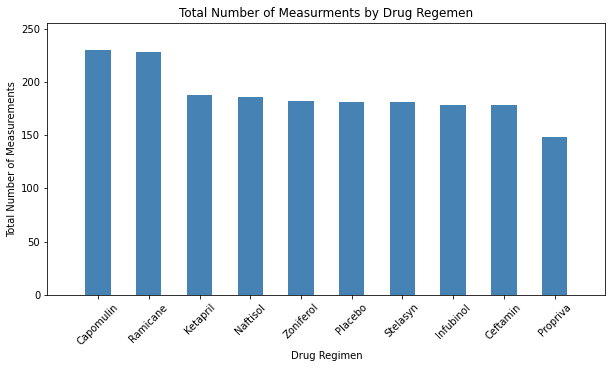

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_df = pd.DataFrame({"Total Number of Measurments" : clean_merge_df["Drug Regimen"].value_counts()})
#drug_regimen_df

drug_regimen_bar = drug_regimen_df.plot.bar(y="Total Number of Measurments", rot=45, color='steelblue', figsize=(10,5), legend=False)
drug_regimen_bar.set_title("Total Number of Measurments by Drug Regemen")
drug_regimen_bar.set_xlabel("Drug Regimen")
drug_regimen_bar.set_ylabel("Total Number of Measurements")
plt.xlim(-1, len(drug_regimen_df.index))
plt.ylim(0, max(drug_regimen_df["Total Number of Measurments"])+25)

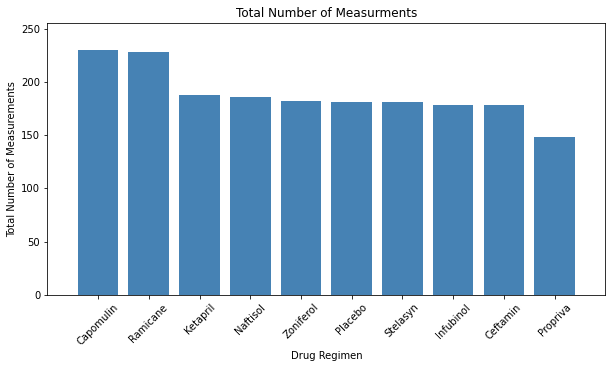

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_regimen_df.index, drug_regimen_df["Total Number of Measurments"], color='steelblue', align="center")
tick_locations = [value for value in drug_regimen_df.index]
plt.xticks(tick_locations, drug_regimen_df.index, rotation=45)
plt.title("Total Number of Measurments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlim(-1, len(drug_regimen_df.index))
plt.ylim(0, max(drug_regimen_df["Total Number of Measurments"])+25)

plt.show()

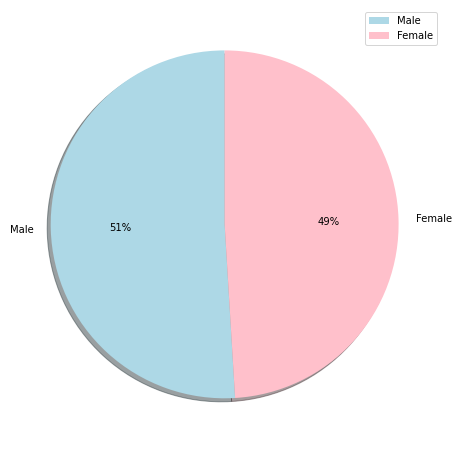

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_df = pd.DataFrame({"Mouse Gender" : clean_merge_df["Sex"].value_counts()})

colors = ["lightblue", "pink"]
mouse_gender_pie = mouse_gender_df.plot.pie(y="Mouse Gender", shadow=True, 
                                            figsize=(8,8), ylabel='', autopct = "%.0f%%", colors=colors, startangle=90)




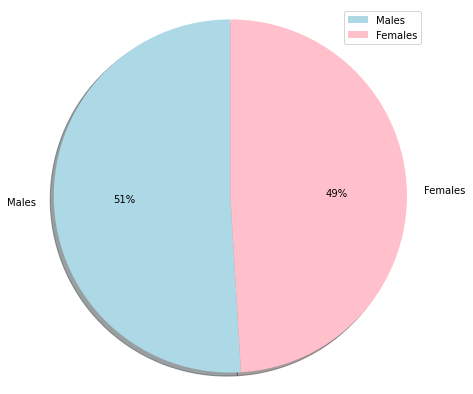

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Males", "Females"]
gender_counts = clean_merge_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=labels, colors=colors, autopct="%1.0f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_final_vol = clean_merge_df.loc[clean_merge_df.groupby(['Drug Regimen', 'Mouse ID'])["Timepoint"].idxmax()]  
mouse_final_vol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.98,2
299,b742,Capomulin,Male,7,21,45,38.94,0
64,f966,Capomulin,Male,16,17,20,30.49,0
244,g288,Capomulin,Male,3,19,45,37.07,1
360,g316,Capomulin,Female,22,22,45,40.16,2


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#drug_regimens = mouse_final_vol["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

lower_quartiles = []
upper_quartiles = []
means=[]
medians = []
iqrs = []
lower_bounds = []
upper_bounds = []
outliers_all = []
ave_weights = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in drug_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    regimen_specific_rows = mouse_final_vol.loc[merge_df["Drug Regimen"] == regimen]

    # add subset for the boxplots farther down
    
    tumor_volumes = regimen_specific_rows["Tumor Volume (mm3)"]
    
    tumor_vol_data.append(tumor_volumes)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    lower_quartiles.append(lowerq)
    
    upperq = quartiles[0.75]
    upper_quartiles.append(upperq)
    
    mean=tumor_volumes.mean()
    means.append(mean)
    
    median = quartiles[0.5]
    medians.append(median)
    
    iqr = upperq-lowerq
    iqrs.append(iqr)


    lower_bound = lowerq - (1.5*iqr)
    lower_bounds.append(lower_bound)
    
    upper_bound = upperq + (1.5*iqr)
    upper_bounds.append(upper_bound)


    outliers = []
    for row in tumor_volumes:
        if row > upper_bound or row < lower_bound:
            outliers.append(round(row ,2))
    outliers_all.append(outliers)
    
    regimen_specific_rows2 = mouse_final_vol.loc[merge_df["Drug Regimen"] == regimen]
    
    weights = regimen_specific_rows["Weight (g)"]
    
    ave_weight = weights.mean()
    ave_weights.append(ave_weight)
    
promising_regimens_df = pd.DataFrame({"Drug Regimen" : drug_regimens,
                                    
                                 "Lower Quartile" : lower_quartiles,

                                 "Upper Quartile" : upper_quartiles,

                                 "Interquartile Range" : iqrs,
                                      
                                 "Mean Volume" : means,

                                 "Median Volume" : medians,

                                 "Lower Bound" : lower_bounds,

                                  "Upper Bound" : upper_bounds,

                                  "Outliers" : outliers_all,
                                      
                                  "Average Mouse Weight" : ave_weights
                                 })
promising_regimens_df    


,Drug Regimen,Lower Quartile,Upper Quartile,Interquartile Range,Mean Volume,Median Volume,Lower Bound,Upper Bound,Outliers,Average Mouse Weight
0,Capomulin,32.38,40.16,7.78,36.67,38.13,20.70,51.83,[],20.12
1,Ramicane,31.56,40.66,9.10,36.19,36.56,17.91,54.31,[],20.00
2,Infubinol,54.05,65.53,11.48,58.18,60.17,36.83,82.74,[36.32],27.32
3,Ceftamin,48.72,64.30,15.58,57.75,59.85,25.36,87.67,[],27.40


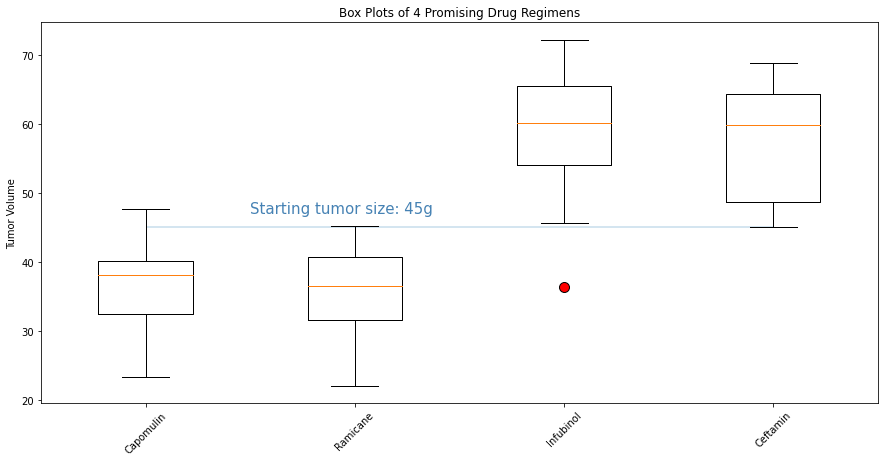

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

x_axis = drug_regimens
fig1, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Box Plots of 4 Promising Drug Regimens')
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none')

ax1.boxplot(tumor_vol_data, flierprops=flierprops)
ax1.set_ylabel("Tumor Volume")
plt.xticks([x for x in range(1, len(drug_regimens)+1)], drug_regimens, rotation=45)
plt.hlines(45, 1, len(drug_regimens), alpha=0.25)
plt.annotate('Starting tumor size: 45g',(1.5,47),fontsize=15, color="steelblue")
plt.show()
#tumor_vol_data

## Line and Scatter Plots

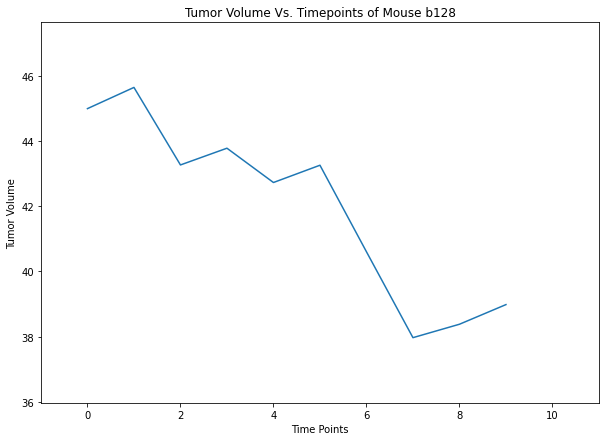

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'b128'
merge_df_mouse = merge_df.loc[merge_df["Mouse ID"] ==mouse_id]
volumes = merge_df_mouse['Tumor Volume (mm3)']
timepoint = merge_df_mouse['Timepoint']

timepoint_count = timepoint.count()
timepoint_count
x_axis = np.arange(0, timepoint_count, 1)

plt.figure(figsize=(10, 7))
plt.xlim(-1, timepoint_count+1)
plt.ylim(volumes.min()-2, volumes.max()+2)
plt.title(f"Tumor Volume Vs. Timepoints of Mouse {mouse_id}")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume")

plt.plot(x_axis, volumes)

plt.show()

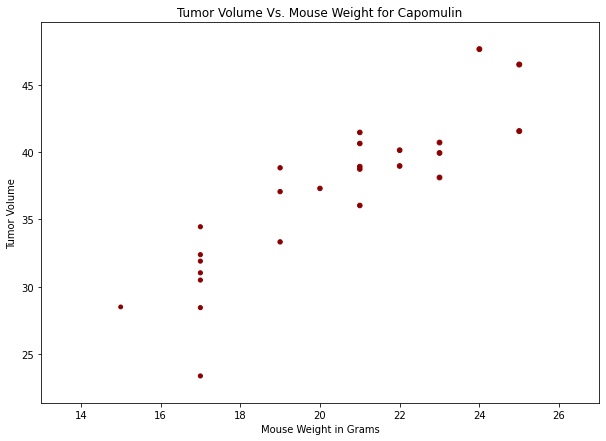

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_regimen = 'Capomulin'
mouse_final_vol = mouse_final_vol.loc[mouse_final_vol["Drug Regimen"] == drug_regimen]

ave_volume = mouse_final_vol['Tumor Volume (mm3)']
mouse_weight = mouse_final_vol['Weight (g)']

plt.figure(figsize=(10, 7))
plt.xlim(mouse_weight.min()-2, mouse_weight.max()+2)
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)
plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")

plt.scatter(mouse_weight, ave_volume, marker="o", facecolors="darkred", s=mouse_weight, alpha=1)
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and tumor volume: 0.88


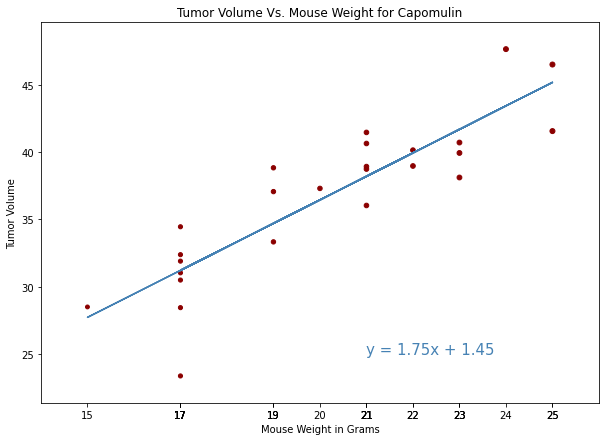

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


print(f"Correlation coefficient between mouse weight and tumor volume: \
{round(st.pearsonr(mouse_weight,ave_volume)[0],2)}")

# Create equation of line to calculate predicted violent crime rate

slope, intercept, rvalue, pvalue, stderr = stats.linregress(mouse_weight, ave_volume)

regress_values = mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10, 7))
plt.xlim(mouse_weight.min()-1, mouse_weight.max()+1)
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)
plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")

plt.annotate(line_eq,(21,25),fontsize=15, color="steelblue")

plt.scatter(mouse_weight, ave_volume, marker="o", facecolors="darkred", s=mouse_weight, alpha=1)

plt.plot(mouse_weight, regress_values, color="steelblue")

plt.xticks(mouse_weight, rotation=0 )

plt.show()